# Credit Card Predictions - Lab 2 Classification

Antonio Debouse, Bodie Franklin, Eric Romero



### Table of Contents:

   * <a href="#DATA1"> Data Preparation Part 1 </a>
   * <a href="#DATA2"> Data Preparation Part 2 </a>
   * <a href="#MODEL1"> Modeling and Evaluation 1 </a>
   * <a href="#MODEL2"> Modeling and Evaluation 2 </a>
   * <a href="#MODEL3"> Modeling and Evaluation 3 </a>
       * **Task 1: Predicting Payment Default Category**
           * <a href="#BASE1"> Base Logistic Regression Model </a>
           * <a href="#RFE1"> Logistic Regression Model </a>
           * <a href="#FOREST1"> Random Forest Model </a>
           * <a href="#KNN1"> KNN Model </a>
       * **Task 2: Predicting Education Level Category**
           * <a href="#BASE2"> Base Logistic Regression Model </a>
           * <a href="#RFE2"> Logistic Regression Model </a>
           * <a href="#FOREST2"> Random Forest Model </a>
           * <a href="#KNN2"> KNN Model </a>
   * <a href="#MODEL4"> Modeling and Evaluation 4 </a>
       * <a href="#T1"> Task 1 Evaluation </a>
       * <a href="#T2"> Task 2 Evaluation </a>
   * <a href="#MODEL5"> Modeling and Evaluation 5 </a>
   * <a href="#MODEL6"> Modeling and Evaluation 6 </a>
   * <a href="#DEPLOY"> Deployment </a>
   * <a href="#EXC"> Exceptional Work </a>      

<a id="DATA1"></a>
# Data Preparation Part 1

Referencing our Lab 1, credit card companies are always in search of better ways to monitor borrowers to determine if the credit card borrower will default on their credit card payments or make them in full. Defaulted credit card payments are often difficult to recoup and create losses for these companies. Defaulting on a payment is defined as not meeting the debt obligation (which is the credit card payment). Our dataset is composed of 24 attributes and 30,000 records that reflect a Taiwanese credit card borrower’s payment history over a six month period.The data was pulled from UCI machine learning repository. The purpose of the dataset is to provide attributes at different points in their payment history to identify if a credit card borrower will default on their payments or pay in full. Since the dataset captures six payment periods, it gives the credit card firm a chance to identify if default will occur or not in various billing cycles.

For the purpose of lab 2, we have two sets of classification tasks. 

**Payment Default:**
* For task 1, we are predicting credit default payments as a classification problem. This class variable is defined as “default_payment_next_month” and has values of 0 & 1.  The 0 represents payment made(no default) and 1 represents missed payment which is considered default. The ability to predict default payment allows card credit companies to be proactive to prevent losses and as a result achieve higher revenue.


**Education Level**
* For task 2, we are predicting education levels of the credit card borrowers. The education levels are broken out into 4 subgroups. The education levels are defined as 1 the highest level of education and 4 as the lowest; levels 5, 6 and 0 were removed as they represented unknown categories. The assumption behind this was that they were small amounts of data that did not represent the major categories and therefore could be moved into the "other" category with little effect on the overall data set.

    * Levels defined as following:
        
        * 1 represents an individual with a PhD or Masters’ degree.
             
        * 2 represents an individual with a college degree such as a bachelors.
                
        * 3 represents an individual with a high school diploma. 
                
        * 4 represents an individual with other as education. Perhaps the individual dropped out of high school / middle school or has no formal education.


**Data Cleaning/Pre-processing Summary from Lab 1 and Mini-Lab:**
* Based on insight gained from Lab 1, we removed records that had values not in the defined range of the data for categorical attributes of Education and Marriage. In example, Marriage had values of 0, but only values 1,2,3 were defined. We addressed these ambiguous values in the data by deleting the records that contained them. The assumption is that these records represented less than 2% of the dataset and were potentially mislabeled.Therefore the records could be removed with little effect on the overall data set.


* The ID attribute was removed as it had no bearing on our classifications.


* Data was checked for missing values and none were found.


* We also checked data for duplicates and none were found.


* Assuming values that were more than 3 standard deviations of the mean, we identified potentially 3315 outliers within our dataset. We experimented with the data by removing the outliers from the data to see what our correlation would be comparatively to our predicted variable of default payment next month. When outliers were removed the correlations were lower for the vast majority of variables. Based on this outcome we decided not to remove the outliers from our data set due to their strong effect on correlations.


* All categorical variables in the dataset were initially in integer format. Therefore, no encoding or transformation was needed.


* No new variables were created for any models.


* Predictors values were normalized through pipelines after cleaning the dataset.


* PCA was attempted in order to reduce dimensionality but had little improvement.


* The minority class for payment default was oversampled utilizing the SMOTE technique in order to balance dataset.

In [1]:
import pandas as pd

DataMeaningType = pd.DataFrame(
{'Attribute': ['LIMIT_BAL', 'Gender:', 'Education:','Marital status:','Age:','PAY_0 to PAY6:','BILL_AMT1 to BILL_AMT6:','PAY_AMT1 to PAY_AMT6:','Default payment next month:'],
'Data Type ': ['Nomminal scale', 'Categorical', 'Ordinal scale','Categorical scale','Numerical/Nomminal','Categorical scale','Nominal scale','Nominal scale','Categorical scale'],
'Description': ['Combined total of credit (amount of money) given to the individual borrower and their family.', '1 represents male and 2 represents female.', '1 represents the highest level of education and 4 would be the lowest. 1 = graduate school, 2 = university, 3 = high school and 4 = others.','1 = married, 2 = single, 3 = others. Value 0 is undefined.','Measures how old a borrower is.','Categorical scale','These attributes describe the past monthly payment status of each made. For example, PAY_0 represents the payment status in September 2005 and PAY_6 represents the payment status in April 2005. -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.','This value represents the amount of the credit card bill paid in each respective month','1 represents a default or missed payment. 0 represents payment made.']})
pd.set_option("max_colwidth", 3000)

DataMeaningType 

,Attribute,Data Type,Description
0,LIMIT_BAL,Nomminal scale,Combined total of credit (amount of money) given to the individual borrower and their family.
1,Gender:,Categorical,1 represents male and 2 represents female.
2,Education:,Ordinal scale,"1 represents the highest level of education and 4 would be the lowest. 1 = graduate school, 2 = university, 3 = high school and 4 = others."
3,Marital status:,Categorical scale,"1 = married, 2 = single, 3 = others. Value 0 is undefined."
4,Age:,Numerical/Nomminal,Measures how old a borrower is.
5,PAY_0 to PAY6:,Categorical scale,Categorical scale
6,BILL_AMT1 to BILL_AMT6:,Nominal scale,"These attributes describe the past monthly payment status of each made. For example, PAY_0 represents the payment status in September 2005 and PAY_6 represents the payment status in April 2005. -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above."
7,PAY_AMT1 to PAY_AMT6:,Nominal scale,This value represents the amount of the credit card bill paid in each respective month
8,Default payment next month:,Categorical scale,1 represents a default or missed payment. 0 represents payment made.


* The table above describes the attributes in detail and what the values represent.

More detailed explaination of attributes can be found at: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

### Import and Adjustment of Data

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('credit_card.csv')

#Deleting ID as useless variable

del df['ID']

#Dropping education variables 0,5,6 & Marriage status 0
#since we don't know what these are per UCI page and these are such a small portion of data less than 3%

df_new = df[(df.EDUCATION !=0)&(df.EDUCATION !=5) &
            (df.EDUCATION !=6) & (df.MARRIAGE!= 0)]



#Creating Backup for reference. 
df_base = df_new

df_base_education = pd.DataFrame(df_new,columns = ['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0',
       'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2',
       'BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2',
       'PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','default_payment_next_month'])



* We are removing the ambiguous values from attributes that were determined to not greatly impact the classification task.

In [16]:
#df.loc[data['LIMIT_BAL']>100000,'LIMIT_BAL']
df.loc[df['LIMIT_BAL']>100000,'LIMIT_BAL']
#df.iloc['LIMIT_BAL'>10000,'LIMIT_BAL']
#df.loc['LIMIT_BAL',df['LIMIT_BAL']>10000]

df['LIMIT_BAL'].mean()

167484.32266666667

### Creating and balancing final dataset for Task 1 & Task 2

In [4]:
#Code utilized  from https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
from imblearn.over_sampling import SMOTE
from collections import Counter

if 'default_payment_next_month' in df_new:
    y = df_new['default_payment_next_month'].values
    del df_new['default_payment_next_month']
    X = df_new.values

#Saving out the column names , so we can make dataframes later on 
col = ['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0',
       'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2',
       'BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2',
       'PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

os = SMOTE(random_state=99)


#Our new datasets to use will be X_res,y_res
#X_res is the resample dataset that is now more balance
#Y_res is the target column that is now more balance.

X_res, y_res = os.fit_resample(X, y)

#Previous class distribtion
counter = Counter(y)
print("Previous class breakdown:",counter)

# summarize the new class distribution
counter_res = Counter(y_res)
print("OS_breakout",counter_res)

#This is the base dataset created for task #2 
if 'EDUCATION' in df_base_education:
    Education_Level = df_base_education['EDUCATION'].values
    del df_base_education['EDUCATION']
    Education_pred = df_base_education.values

df_OS = pd.DataFrame(X_res,columns = col)



Previous class breakdown: Counter({0: 22996, 1: 6605})
OS_breakout Counter({1: 22996, 0: 22996})



Our dataset was initially highly imbalanced toward non-defaulters which would make classifcations for our models difficult. To overcome this shortfall, we oversampled the minority class by utilizing the SMOTE technique from imblearn package. SMOTE works by creating synthetic copies of our minority class examples until there is an equal amount of them compared to the majority class examples. As seen above this was initially only 6605 defaults compared to 22996 non-defaults, using the technique raised the amount of default examples to the same count.Now the models will less favor  one class over the other and potentially produce higher prediction  metrics such as accuracy, sensitivity and specificity. The OS dataset used for Task 1 will be broke into the arrays X_res , y_res.


The final dataset used for Task 2 is the just final dataset after cleaning before OS was applied.  In our opinion, it didn't make sense to use the OS sample dataset of default payments for education levels because the education level proportions were the same. We felt that we had enough of each class that utlizing a balanced class weight in CV, we could get by without OS. 


<a id="DATA2"></a>
# Data Preparation Part 2

* Task 1 Dataset:
    * The final dataset used for this is an oversampled df_OS, the oversampled arrays are X_res and y_res.  Our target variable was default_payment_next_month which was removed from the dataset for classification task 1. Seen below, this data set contains 23 features which were oversampled to 45992 observations for task 1 models due to the imbalances in our target variable. There arrays were unscaled until ran through the pipeline as part of the model building.
    
* Task 2 Dataset:
    * This data set exchanged Education for default_payment_next_month as the target variable. This set was not oversampled as we felt education levels were balanced enough to utililze a balance cross weight and cross validation. Also the oversampled set would have skewed the education levels toward inaccurate representation.

###  OverSample dataset (Classification Task 1)

In [5]:
df_OS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45992 entries, 0 to 45991
Data columns (total 23 columns):
LIMIT_BAL    45992 non-null int64
SEX          45992 non-null int64
EDUCATION    45992 non-null int64
MARRIAGE     45992 non-null int64
AGE          45992 non-null int64
PAY_0        45992 non-null int64
PAY_2        45992 non-null int64
PAY_3        45992 non-null int64
PAY_4        45992 non-null int64
PAY_5        45992 non-null int64
PAY_6        45992 non-null int64
BILL_AMT1    45992 non-null int64
BILL_AMT2    45992 non-null int64
BILL_AMT3    45992 non-null int64
BILL_AMT4    45992 non-null int64
BILL_AMT5    45992 non-null int64
BILL_AMT6    45992 non-null int64
PAY_AMT1     45992 non-null int64
PAY_AMT2     45992 non-null int64
PAY_AMT3     45992 non-null int64
PAY_AMT4     45992 non-null int64
PAY_AMT5     45992 non-null int64
PAY_AMT6     45992 non-null int64
dtypes: int64(23)
memory usage: 8.1 MB


###  Education dataset (Classification Task 2)

In [6]:
df_base_education.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29601 entries, 0 to 29999
Data columns (total 23 columns):
LIMIT_BAL                     29601 non-null int64
SEX                           29601 non-null int64
MARRIAGE                      29601 non-null int64
AGE                           29601 non-null int64
PAY_0                         29601 non-null int64
PAY_2                         29601 non-null int64
PAY_3                         29601 non-null int64
PAY_4                         29601 non-null int64
PAY_5                         29601 non-null int64
PAY_6                         29601 non-null int64
BILL_AMT1                     29601 non-null int64
BILL_AMT2                     29601 non-null int64
BILL_AMT3                     29601 non-null int64
BILL_AMT4                     29601 non-null int64
BILL_AMT5                     29601 non-null int64
BILL_AMT6                     29601 non-null int64
PAY_AMT1                      29601 non-null int64
PAY_AMT2                

<a id="MODEL1"></a>
# Modeling and Evaluation 1

**Task 1: Payment Default**
* For this classification we are trying to predict whether payment default will occur or not. Accuracy would work best for this task as it will represent both those that defaulted and did not default. Knowing the attributes of those that would default is useful for knowing what clients to avoid, while knowing the attributes of those that do not default would give insight into what type of clients to pursue. 
* Sensitivity will represents our models ability to correctly identify the true positive defaults. 
* Specificity will be useful for measuring our models ability to correctly identify those that did not default.
* We also analyzed AUC under the ROCs to check that our prediction models are reaching an acceptable accuracy of distinguishing between the different classes.
* The effectiveness of a good classification algorithm is one that produces strong accuracy, sensitivity, and specificity scores through cross validation. If an effective classification model can be built, the credit company will have the ability to proactively monitor borrowers in various credit stages. The significance of identifying default or not will allow the credit card to minimize their losses. If early default identification occurs, the credit card company can reduce the borrower’s credit limits or preemptively work with the borrower to create new repayment plans. Both outcomes will help the credit company reduce their losses that would occur if no action were taken.


**Task 2: Education Level**
* Based on our analysis from Lab 1 we saw that education level had a strong correlation with defaulters and a pre-screen process based on education level would be a good indictor for assessing the applicant's level of risk. Therefore the second classification we are trying to predict is level of education. 
* Accuracy would work best for this task as it will represent correctly identifying each of the education levels. This will be useful for establishing what traits lead to a specific education level related to better clients.
* Sensitivity will represents our models ability to correctly identify the education level that were picked correctly. 
* Specificity will be useful for measuring our models ability to correctly identify education levels that were not picked correctly.

<a id="MODEL2"></a>
# Modeling and Evaluation 2

* We trained our models on a 10-fold cross validation using an 80/20 split with random state set to a seed variable. Initially this included all variables and was later reduced through recursive feature elimination. In 10-fold cross-validation, the original dataset is randomly partitioned into 10 equal sample portions. One of the 10 samples is used as the validation data for the model to test on. Each of the sample subsets is then used only once with the validation data and the results combined to make a single estimation.
    * Our data set was approximately 30,000 *(prior to oversampling)* observations which allows us to use cross validation.
    * The dataset was balanced to create equal amounts of response in task1, therefore a stratified method was deemed unnecessary.
    * Task 2 was less imbalanced than task 1, however we used stratified 10-fold cross validation for task 2 in order to ensure that each fold would remain representative of the distributions in the dataset as a whole.
    * This is advantageous in that all the observations are used for training and validation only once which helps to avoid overfitting the model.
    * For each respective task these methods were selected to limit the bias toward a particular category our model would have for predicting on only one validation set.

### Creating Seed and CV object (Classification Task 1 & 2)

In [7]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold

import random
#Setting Seed
#will use this in CV portion
random.seed(10)
seed = random.randint(1,500)
print("seed is:",seed)


#Creating the Task 1 CV
num_cv_iterations = 10
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         random_state = seed,
                         test_size  = 0.2)

#Creating the Task 2 CV
num_edu_instances = len(Education_Level)
Education_cv_object = StratifiedKFold(n_splits=num_cv_iterations,
                         random_state = seed,
                         shuffle=True)

print(cv_object)
print(Education_cv_object)

seed is: 293
ShuffleSplit(n_splits=10, random_state=293, test_size=0.2, train_size=None)
StratifiedKFold(n_splits=10, random_state=293, shuffle=True)


In the above section, we are creating the CV object that we will use to test the metrics of each model. The seed is set is 293,
so all models will have the same seed for apples to apples comparison. We used an 80/20 split for the task 1 CV object in this lab.

<a id="MODEL3"></a>
# Modeling and Evaluation 3

<a id="BASE1"></a>
### Baseline Logistic Regression Model (Classification Task 1)

In [8]:
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics as mt
from sklearn.linear_model import LogisticRegression
import imblearn
import numpy as np


#code utlized from 04 Logits & SVM notebook
#We are keeping paramters of LogisticRegression blank until we do paramter tuning
std_scl = StandardScaler()
lr_clf = LogisticRegression() 

# create the pipline
#code utlized from 04 Logits & SVM notebook
piped_object = Pipeline([('scale', std_scl),  # do this
                         ('logit_model', lr_clf)]) # and then do this

#code utlized from 04 Logits & SVM notebook
#We trained our model(including all variables at the moment) on 10 CV with random state set to the seed variable
#We are looping through and calcing ACC,Spec and Sensitivty.
#This section utliztied code from unit 4 notebook &
#https://statinfer.com/204-4-2-calculating-sensitivity-and-specificity-in-python/

Iteration = []
Accuracy = []
Sensitivity = []
Specificity = []

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X_res,y_res)):
    piped_object.fit(X_res[train_indices],y_res[train_indices])  # train object
    y_hat = piped_object.predict(X_res[test_indices]) # get test set precitions
    
    cm1 = mt.confusion_matrix(y_res[test_indices],y_hat)
    
    Iteration.append(iter_num)
    Accuracy.append(mt.accuracy_score(y_res[test_indices],y_hat))
    Sensitivity.append(cm1[0,0]/(cm1[0,0]+cm1[0,1]))
    Specificity.append(cm1[1,1]/(cm1[1,0]+cm1[1,1]))
    
lr_base_results = pd.DataFrame({'Iteration':Iteration,'Accuracy': Accuracy,'Sensitivity':Sensitivity,
                                'Specificity':Specificity},columns = ['Iteration','Accuracy','Sensitivity','Specificity'])


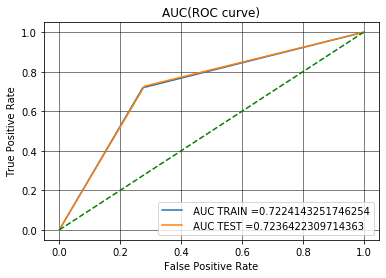

Wall time: 280 ms


,Iteration,Accuracy,Sensitivity,Specificity
0,0,0.726275,0.734317,0.718206
1,1,0.722796,0.721170,0.724456
2,2,0.720513,0.726004,0.714883
3,3,0.721274,0.725796,0.716718
4,4,0.721274,0.720818,0.721720
5,5,0.727144,0.732942,0.721340
6,6,0.725840,0.728280,0.723395
7,7,0.719100,0.725508,0.712878
8,8,0.721600,0.724517,0.718743
9,9,0.721709,0.724537,0.718899


In [11]:
%%time
#Utilized code from https://datascience.stackexchange.com/questions/69442/plotting-roc-auc-for-svm-algorithm
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.20)

lr_clf = LogisticRegression() 

piped_object = Pipeline([('scale', std_scl),  # do this
                         ('logit_model', lr_clf)]) # and then do this




piped_object.fit(X_train,y_train)

y_train_pred =piped_object.predict(X_train)    
y_test_pred = piped_object.predict(X_test) 

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()
(lr_base_results)

### Baseline Model Results
Our first task was to build a base logistic regression model  included all of the features within the dataset. This was done to gain a sense of how the predictions performed and then  use as a baseline comparsion score for our other models. The baseline
model over 10 iterations performed a 72% average for accuracy, sensitivity, and specificity. Examining the ROC curve, we can assess our models' true-positive to false-positive tradeoff relationship.  The AUC for both the training and test set is basically identical at about 72%, which gives us confidence that our prediction model will preform well on other similar datasets.The base logisitic regression model had no parameters associated with it.As it is not practical to include all the features, we will continue on to alternative models that eliminate some features in favor of a higher scoring metric.

### Recursive Feature Elimination (RFE) (Classification Task 1)

In [12]:
%%time
#For building our logic model, we used RFE
# we utlized code from https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

#Since our model has a bunch of coffeicnets , we're going to use RFE in order to figure out which variables to elimate from our
#model. once we near our list, then we will have completed building a logistic regression model!

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


std_scl = StandardScaler()
lr_clf = LogisticRegression() 
rfe = RFE(lr_clf, n_features_to_select=10)

# create the pipline
#code utlized from 04 Logits & SVM notebook
piped_object_RFE = Pipeline([('scale', std_scl),  
                             ('RFE',rfe)]) 
 



#rfe = rfe.fit(X_res, y_res.ravel())

RFE_RESULTS = piped_object_RFE.fit(X_res,y_res.ravel())

print(rfe.support_)
print(rfe.ranking_)
#This gives us the column names from RFE feature selection.
df_new.columns[rfe.support_]

[ True  True  True  True False  True False False False  True False  True
  True False False False False  True  True False False False False]
[ 1  1  1  1  4  1  2  8 10  1 14  1  1  9 13 12  6  1  1  3  7  5 11]
Wall time: 1.12 s


Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_5',
       'BILL_AMT1', 'BILL_AMT2', 'PAY_AMT1', 'PAY_AMT2'],
      dtype='object')

### RFE Feature Analysis (Classification Task 1)
RFE works by first including all the features or attributes in the initial model. Next the weakest features relating to our predicted category are removed one by one until a specific amount of features is reached. This process particularly targets elimination of any dependencies and collinearity between attributes that would make our predictions more difficult. The amount of features kept is determined by cross validation with RFE to score each of the features and select which ones give the best values for prediction.

Based on running the RFE model, features were eliminated down to 10 attributes as seen in the above index. Specifically most attributes removed were related to bill and payment amounts, those that were kept in the model were around the beginning and end of the records. This matches with our analysis from Lab 1 that showed these attributes were more correlated over any other. Attributes such as sex, education, and marriage were also identified to be included in the model which we also saw from our Lab 1 analysis displayed some small relationships with the default category.

### Filtering dataset after RFE analysis (Classification Task 1)

In [13]:
#The above True/False line up with the columns
#'SEX','EDUCATION','EDUCATION','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','PAY_AMT1'
#So we need to reorg the dataframe X_res then continue with the process

X_rs = pd.DataFrame(data=X_res,columns=col)

imp_col = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_5',
       'BILL_AMT1', 'BILL_AMT2', 'PAY_AMT1', 'PAY_AMT2']

X_rs  = X_rs[imp_col]

y_rs = pd.DataFrame(data=y_res,columns=['default_payment_next_month'])

#Checking the heads to make sure it worked
X_rs.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_5,BILL_AMT1,BILL_AMT2,PAY_AMT1,PAY_AMT2
0,20000,2,2,1,2,-2,3913,3102,0,689
1,120000,2,2,2,-1,0,2682,1725,0,1000
2,90000,2,2,2,0,0,29239,14027,1518,1500
3,50000,2,2,1,0,0,46990,48233,2000,2019
4,50000,1,2,1,-1,0,8617,5670,2000,36681


In the code section above, we are filtering the dataset to only include the features that RFE deemed appropriate. The head is printed
just to check that the filtering was successful. 

<a id="RFE1"></a>
### Logistic Regression After RFE (Classification Task 1)

In [14]:
X_rs = X_rs.values
y_rs = y_rs['default_payment_next_month'].values



Iteration_fbase = []
Accuracy_fbase = []
Sensitivity_fbase = []
Specificity_fbase = []

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X_rs,y_rs)):
    piped_object.fit(X_rs[train_indices],y_rs[train_indices])  
    y_hat = piped_object.predict(X_rs[test_indices]) 
    
    cm1 = mt.confusion_matrix(y_rs[test_indices],y_hat)
    
    Iteration_fbase.append(iter_num)
    Accuracy_fbase.append(mt.accuracy_score(y_rs[test_indices],y_hat))
    Sensitivity_fbase.append(cm1[0,0]/(cm1[0,0]+cm1[0,1]))
    Specificity_fbase.append(cm1[1,1]/(cm1[1,0]+cm1[1,1]))
    
final_base_results = pd.DataFrame({'Iteration':Iteration_fbase,'Accuracy': Accuracy_fbase,'Sensitivity':Sensitivity_fbase,
                                'Specificity':Specificity_fbase},columns = ['Iteration','Accuracy','Sensitivity','Specificity'])





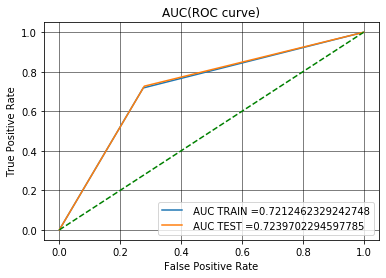

,Iteration,Accuracy,Sensitivity,Specificity
0,0,0.728775,0.736922,0.720601
1,1,0.722470,0.718158,0.726873
2,2,0.721818,0.726004,0.717525
3,3,0.719643,0.726013,0.713226
4,4,0.718665,0.717520,0.719785
5,5,0.724427,0.731204,0.717642
6,6,0.725188,0.728497,0.721872
7,7,0.719100,0.728376,0.710092
8,8,0.720622,0.722979,0.718313
9,9,0.720948,0.726936,0.714998


In [15]:
#Utilized code from https://datascience.stackexchange.com/questions/69442/plotting-roc-auc-for-svm-algorithm
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X_rs, y_rs, test_size = 0.20)

lr_clf = LogisticRegression() 

piped_object = Pipeline([('scale', std_scl),  # do this
                         ('logit_model', lr_clf)]) # and then do this

X_train, X_test, y_train, y_test = train_test_split(X_rs, y_rs, test_size = 0.20)


piped_object.fit(X_train,y_train)

y_train_pred =piped_object.predict(X_train)    
y_test_pred = piped_object.predict(X_test) 

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()


final_base_results

### Results of Model after RFE Analysis (Classification Task 1)
The results of 10 CV for our logistic regression model after using RFE, shown above, resulted in a consistent 72% average for accuracy, sensitivity, and specificity.In comparison to our base logistic regression model these are nearly the same outcomes, with some small differences such as specificity. Specificity seems to be slightly lower here. This result potentially fits with our initial assumptions from Lab 1; attributes such as payments or bill amounts recorded between period 3 to period 4 have little impact on the predicting defaults. Overall scoring metrics were not significantly impacted, removing those attributes improved the run time of the model since less features were used. Examining the ROC curve, we can assess our models' true-positive to false-positive tradeoff relationship.  The AUC for both the training and test set is basically identical at about 72%, which gives us confidence that our prediction model will preform well on other similar datasets.


### Hyperparameter Tuning Logistic Regression model (Classification Task 1)

In [31]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_rs, y_rs, test_size = 0.20)



#found parameters from document
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

lr_param_grid = {'penalty':['l1', 'l2', 'elasticnet', 'none'],
              'C': [.001,.01,.1,1,10,100],'class_weight':['dict','balanced','none'],
              'solver':[ 'liblinear']
             }


#We set error score to 0 to avoid warnings messages for NaN due 
#to Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty

LR_TASK1_grid = GridSearchCV(LogisticRegression(),param_grid=lr_param_grid,cv=10,scoring='accuracy',refit=True,verbose=2,
                   n_jobs=-1,error_score=0)


piped_object_lr_pt = Pipeline([('scale', std_scl),  
                         ('gridsearch', LR_TASK1_grid)])


piped_object_lr_pt.fit(X_train,y_train)


print(LR_TASK1_grid.best_estimator_)
print("------------------------------------------------------------------------")
cv_results = pd.DataFrame(LR_TASK1_grid.cv_results_)
print(cv_results.iloc[LR_TASK1_grid.best_index_])
print("------------------------------------------------------------------------")
print(LR_TASK1_grid.best_params_)

Fitting 10 folds for each of 72 candidates, totalling 720 fits
LogisticRegression(C=0.1, class_weight='balanced', penalty='l1',
                   solver='liblinear')
------------------------------------------------------------------------
mean_fit_time                                                                               0.629371
std_fit_time                                                                                0.325162
mean_score_time                                                                          9.94921e-05
std_score_time                                                                           0.000298476
param_C                                                                                          0.1
param_class_weight                                                                          balanced
param_penalty                                                                                     l1
param_solver                                         

### Parameter Tuning (Classification Task 1)
Hyper parameter tuning allows us to attempt to increase the accuracy of our model at the expense of potentially overfitting our data. To find values to use for the hyperparameters we used a grid search. Optimizations was done through parameter penalties, inverse regularization strength (C), class weights and solvers selected from the list generated by the above code. Our parameter tuning results suggest that the best paramters for our model is :
{'C': 1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

 <a id="FLRM"></a>
  
### Final Logistic Regression Model (Classification Task 1)

In [32]:
%%time
from sklearn import metrics

lr_clf = LogisticRegression(C=.1,class_weight='balanced',penalty='l1',solver='liblinear') 

# create the pipline
#code utlized from 04 Logits & SVM notebook
piped_object_lr = Pipeline([('scale', std_scl),  # do this
                         ('logit_model', lr_clf)]) # and then do this

Iteration_lrbase = []
Accuracy_lrbase = []
Sensitivity_lrbase = []
Specificity_lrbase = []


weights_lr_final = []
for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X_rs,y_rs)):
    piped_object_lr.fit(X_rs[train_indices],y_rs[train_indices])  
    weights_lr_final.append(piped_object_lr.named_steps['logit_model'].coef_[0])
    y_hat = piped_object_lr.predict(X_rs[test_indices]) 
    
    cm1 = mt.confusion_matrix(y_rs[test_indices],y_hat)
    
    Iteration_lrbase.append(iter_num)
    Accuracy_lrbase.append(mt.accuracy_score(y_rs[test_indices],y_hat))
    Sensitivity_lrbase.append(cm1[0,0]/(cm1[0,0]+cm1[0,1]))
    Specificity_lrbase.append(cm1[1,1]/(cm1[1,0]+cm1[1,1]))
    

final_lr_results= pd.DataFrame({'Iteration':Iteration_lrbase,'Accuracy': Accuracy_lrbase,
                            'Sensitivity':Sensitivity_lrbase,'Specificity':Specificity_lrbase},
                            columns = ['Iteration','Accuracy','Sensitivity','Specificity'])





Wall time: 2.56 s


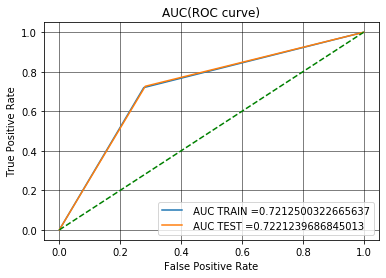

,Iteration,Accuracy,Sensitivity,Specificity
0,0,0.728884,0.737573,0.720166
1,1,0.722687,0.719234,0.726214
2,2,0.722252,0.727936,0.716424
3,3,0.719317,0.726446,0.712134
4,4,0.718882,0.715102,0.722581
5,5,0.724318,0.731421,0.717207
6,6,0.725622,0.728931,0.722307
7,7,0.719426,0.724625,0.714378
8,8,0.720296,0.719684,0.720895
9,9,0.721274,0.725845,0.716732


In [33]:
#Utilized code from https://datascience.stackexchange.com/questions/69442/plotting-roc-auc-for-svm-algorithm
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(X_rs, y_rs, test_size = 0.20)


lr_clf = LogisticRegression(C=.1,class_weight='balanced',penalty='l2',solver='liblinear') 

piped_object = Pipeline([('scale', std_scl),  # do this
                         ('logit_model', lr_clf)]) # and then do this

X_train, X_test, y_train, y_test = train_test_split(X_rs, y_rs, test_size = 0.20)


piped_object.fit(X_train,y_train)

y_train_pred =piped_object.predict(X_train)    
y_test_pred = piped_object.predict(X_test) 

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()



(final_lr_results)

The results of 10 CV for our logistic regression model after using RFE and parameter tuning , shown above, resulted in a consistent 72% average for accuracy, sensitivity, and specificity. These results are similiar to our base logistric regression model and our logistric regression model after RFE. Therefore there is no gain in scoring metrics.The final logistic regression model has less features ,therefore would be prefered over the base since it is the less complicated model. Examining the ROC curve, we can assess our models' true-positive to false-positive tradeoff relationship. The AUC for both the training and test set is basically identical at about 72%, which gives us confidence that our prediction model will preform well on other similar datasets.

<a id="FOREST1"></a>
## Random Forest Base Model (Classification Task 1)

In [29]:
%%time
#Random Forest
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics as mt
from sklearn.pipeline import Pipeline


std_scl = StandardScaler()
rf_clf = RandomForestClassifier()

piped_object = Pipeline([('scale', std_scl),  
                         ('Random_Forest', rf_clf)]) 


Iteration = []
Accuracy = []
Sensitivity = []
Specificity = []

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X_rs,y_rs)):
    piped_object.fit(X_rs[train_indices],y_rs[train_indices])  # train object
    y_hat = piped_object.predict(X_rs[test_indices]) # get test set precitions
    
    cm1 = mt.confusion_matrix(y_rs[test_indices],y_hat)
    
    Iteration.append(iter_num)
    Accuracy.append(mt.accuracy_score(y_rs[test_indices],y_hat))
    Sensitivity.append(cm1[0,0]/(cm1[0,0]+cm1[0,1]))
    Specificity.append(cm1[1,1]/(cm1[1,0]+cm1[1,1]))
    
rf_base_results = pd.DataFrame({'Iteration':Iteration,'Accuracy': Accuracy,'Sensitivity':Sensitivity,
                                'Specificity':Specificity},columns = ['Iteration','Accuracy','Sensitivity','Specificity'])


rf_base_results

Wall time: 46.7 s


,Iteration,Accuracy,Sensitivity,Specificity
0,0,0.813349,0.834382,0.792247
1,1,0.808457,0.816910,0.799824
2,2,0.810740,0.830578,0.790401
3,3,0.808349,0.820879,0.795722
4,4,0.811719,0.825236,0.798495
5,5,0.820089,0.837462,0.802697
6,6,0.813893,0.834492,0.793254
7,7,0.806283,0.827008,0.786158
8,8,0.811066,0.824692,0.797719
9,9,0.813675,0.826827,0.800607


### Tuning Random Forest (Classification Task 1)

In [34]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

#Grab the parameters from 
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
#utilized parameter writing from following link
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

# Number of trees in random forest
n_estimators = [10,100]
#criterion
criterion  = ['gini']
# Maximum number of levels in tree
max_depth = [10,100]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
class_weight = ['balanced','balanced_subsample']
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Method of selecting samples for training each tree
bootstrap = ['bool', False]


X_train, X_test, y_train, y_test = train_test_split(X_rs, y_rs, test_size = 0.20)



random_forest_grid = {'n_estimators': n_estimators,
                      'criterion':criterion,
                       'max_features': max_features,
                       'max_depth': max_depth,
                       'min_samples_split': min_samples_split,
                       'min_samples_leaf': min_samples_leaf,
                        'bootstrap': bootstrap}


RF_Task1_grid = GridSearchCV(RandomForestClassifier(),param_grid=random_forest_grid,cv=10,scoring='accuracy',refit=True,verbose=2,
                   n_jobs=-1,error_score=0)


piped_object_lr_pt = Pipeline([('scale', std_scl),  
                         ('gridsearch', RF_Task1_grid)])


piped_object_lr_pt.fit(X_train,y_train)


print(RF_Task1_grid.best_estimator_)
print("------------------------------------------------------------------------")
cv_results = pd.DataFrame(RF_Task1_grid.cv_results_)
print(cv_results.iloc[RF_Task1_grid.best_index_])
print("------------------------------------------------------------------------")
print(RF_Task1_grid.best_params_)

Fitting 10 folds for each of 96 candidates, totalling 960 fits
RandomForestClassifier(bootstrap='bool', max_depth=100, max_features='sqrt')
------------------------------------------------------------------------
mean_fit_time                                                                                                                                                               8.37398
std_fit_time                                                                                                                                                               0.102714
mean_score_time                                                                                                                                                            0.139852
std_score_time                                                                                                                                                           0.00951841
param_bootstrap                                                    

### Random Forest After Tuning (Classification Task 1)

In [119]:
%%time

std_scl = StandardScaler()
rf_clf = RandomForestClassifier(bootstrap= 'bool', criterion= 'gini', max_depth= 100, 
                           max_features='sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators = 100)

piped_object = Pipeline([('scale', std_scl),  
                         ('Random_Forest', rf_clf)]) 


Iteration = []
Accuracy = []
Sensitivity = []
Specificity = []

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X_rs,y_rs)):
    piped_object.fit(X_rs[train_indices],y_rs[train_indices])  # train object
    y_hat = piped_object.predict(X_rs[test_indices]) # get test set precitions
    
    cm1 = mt.confusion_matrix(y_rs[test_indices],y_hat)
    
    Iteration.append(iter_num)
    Accuracy.append(mt.accuracy_score(y_rs[test_indices],y_hat))
    Sensitivity.append(cm1[0,0]/(cm1[0,0]+cm1[0,1]))
    Specificity.append(cm1[1,1]/(cm1[1,0]+cm1[1,1]))
    
rf_best_results = pd.DataFrame({'Iteration':Iteration,'Accuracy': Accuracy,'Sensitivity':Sensitivity,
                                'Specificity':Specificity},columns = ['Iteration','Accuracy','Sensitivity','Specificity'])

feature_importances_1 = pd.DataFrame(rf_clf.feature_importances_,
                                   index = imp_col ,
                                    columns=['importance Task_1']).sort_values('importance Task_1', ascending=False)




Wall time: 51.3 s


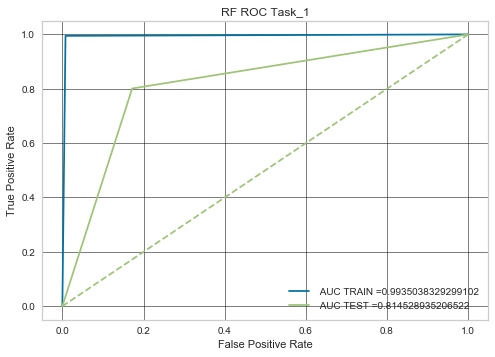

Wall time: 6.22 s


,Iteration,Accuracy,Sensitivity,Specificity
0,0,0.813458,0.829390,0.797474
1,1,0.808784,0.818201,0.799165
2,2,0.812371,0.832940,0.791281
3,3,0.810740,0.826078,0.795286
4,4,0.812697,0.822379,0.803226
5,5,0.817915,0.832899,0.802915
6,6,0.813567,0.834926,0.792165
7,7,0.807153,0.826787,0.788087
8,8,0.810088,0.823814,0.796643
9,9,0.810632,0.821810,0.799523


In [120]:
%%time

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(X_rs, y_rs, test_size = 0.20)


 

rf_clf = RandomForestClassifier(bootstrap= 'bool', criterion= 'gini', max_depth= 100, 
                           max_features='sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators = 100)

piped_object = Pipeline([('scale', std_scl),  
                         ('Random_Forest', rf_clf)]) 

piped_object.fit(X_train,y_train)

y_train_pred =piped_object.predict(X_train)    
y_test_pred = piped_object.predict(X_test) 

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("RF ROC Task_1")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()


rf_best_results

<a id="KNN1"></a>
## KNN Model (Classification Task 1)

In [36]:
%%time

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics as mt
from sklearn.pipeline import Pipeline


std_scl = StandardScaler()
knn_clf = KNeighborsClassifier()

piped_object = Pipeline([('scale', std_scl),  
                         ('KNN', knn_clf)]) 


Iteration = []
Accuracy = []
Sensitivity = []
Specificity = []

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X_rs,y_rs)):
    piped_object.fit(X_rs[train_indices],y_rs[train_indices])  # train object
    y_hat = piped_object.predict(X_rs[test_indices]) # get test set precitions
    
    cm1 = mt.confusion_matrix(y_rs[test_indices],y_hat)
    
    Iteration.append(iter_num)
    Accuracy.append(mt.accuracy_score(y_rs[test_indices],y_hat))
    Sensitivity.append(cm1[0,0]/(cm1[0,0]+cm1[0,1]))
    Specificity.append(cm1[1,1]/(cm1[1,0]+cm1[1,1]))
    
knn_base_results = pd.DataFrame({'Iteration':Iteration,'Accuracy': Accuracy,'Sensitivity':Sensitivity,
                                'Specificity':Specificity},columns = ['Iteration','Accuracy','Sensitivity','Specificity'])


knn_base_results

Wall time: 11.5 s


,Iteration,Accuracy,Sensitivity,Specificity
0,0,0.750190,0.734100,0.766333
1,1,0.754973,0.733434,0.776972
2,2,0.751386,0.732231,0.771026
3,3,0.741928,0.730561,0.753383
4,4,0.751169,0.729171,0.772688
5,5,0.753995,0.735115,0.772895
6,6,0.750951,0.738923,0.763003
7,7,0.747907,0.739850,0.755732
8,8,0.749864,0.735940,0.763503
9,9,0.751930,0.736750,0.767013


### KNN Parameter Tuning (Classification Task 1)

In [38]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

#Code utilized from https://medium.datadriveninvestor.com/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f




std_scl = StandardScaler()
knn_clf = KNeighborsClassifier()

X_train, X_test, y_train, y_test = train_test_split(X_rs, y_rs, test_size = 0.20)



KNN_grid = {'n_neighbors': [5,7,8,10],
            'leaf_size': [5,7,8,10],
            'weights': ['uniform','distance'],
            'algorithm': ['auto'],
            'metric': ['minkowski','seuclidean'],
             'p': [1,2]
             }


KNN_TASK1_grid = GridSearchCV(KNeighborsClassifier(),param_grid=KNN_grid,cv=10,scoring='accuracy',refit=True,verbose=2,
                   n_jobs=-1,error_score=0)


piped_object_lr_pt = Pipeline([('scale', std_scl),  
                         ('gridsearch', KNN_TASK1_grid)])


piped_object_lr_pt.fit(X_train,y_train)


print(KNN_TASK1_grid.best_estimator_)
print("------------------------------------------------------------------------")
cv_results = pd.DataFrame(KNN_TASK1_grid.cv_results_)
print(cv_results.iloc[KNN_TASK1_grid.best_index_])
print("------------------------------------------------------------------------")
print(KNN_TASK1_grid.best_params_)

Fitting 10 folds for each of 128 candidates, totalling 1280 fits
KNeighborsClassifier(leaf_size=10, n_neighbors=10, p=1, weights='distance')
------------------------------------------------------------------------
mean_fit_time                                                                                                               0.190541
std_fit_time                                                                                                               0.0755648
mean_score_time                                                                                                             0.663728
std_score_time                                                                                                              0.348507
param_algorithm                                                                                                                 auto
param_leaf_size                                                                                                          

### Final KNN Model (Classification Task 1)

In [39]:
%%time
from sklearn import metrics as mt

std_scl = StandardScaler()
knn_clf = KNeighborsClassifier(algorithm='auto',leaf_size= 10,n_neighbors=10,p= 1,weights='distance',metric = 'minkowski')

piped_object = Pipeline([('scale', std_scl),  
                         ('KNN', knn_clf)]) 


Iteration = []
Accuracy = []
Sensitivity = []
Specificity = []

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X_rs,y_rs)):
    piped_object.fit(X_rs[train_indices],y_rs[train_indices])  # train object
    y_hat = piped_object.predict(X_rs[test_indices]) # get test set precitions
    
    cm1 = mt.confusion_matrix(y_rs[test_indices],y_hat)
    
    Iteration.append(iter_num)
    Accuracy.append(mt.accuracy_score(y_rs[test_indices],y_hat))
    Sensitivity.append(cm1[0,0]/(cm1[0,0]+cm1[0,1]))
    Specificity.append(cm1[1,1]/(cm1[1,0]+cm1[1,1]))
    
knn_final_results = pd.DataFrame({'Iteration':Iteration,'Accuracy': Accuracy,'Sensitivity':Sensitivity,
                                'Specificity':Specificity},columns = ['Iteration','Accuracy','Sensitivity','Specificity'])


knn_final_results

Wall time: 9.45 s


,Iteration,Accuracy,Sensitivity,Specificity
0,0,0.778019,0.742132,0.814024
1,1,0.776280,0.741394,0.811909
2,2,0.777367,0.750698,0.804712
3,3,0.770845,0.740524,0.801397
4,4,0.780411,0.746538,0.813548
5,5,0.783020,0.754889,0.811181
6,6,0.779759,0.754996,0.804570
7,7,0.779541,0.751545,0.806728
8,8,0.776932,0.745826,0.807403
9,9,0.782368,0.752454,0.812094


# Regression Models for Predicting Eduction (Classification Task 2)

<a id="BASE2"></a>
## Base line LR model (Classification Task 2)

In [40]:
%%time
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics as mt
from sklearn.linear_model import LogisticRegression
import imblearn
import numpy as np


#code utlized from 04 Logits & SVM notebook
#We are keeping paramters of LogisticRegression blank until we do paramter tuning
std_scl = StandardScaler()
lr_clf = LogisticRegression() 

# create the pipline
#code utlized from 04 Logits & SVM notebook
piped_object = Pipeline([('scale', std_scl),  # do this
                         ('logit_model', lr_clf)]) # and then do this

#code utlized from 04 Logits & SVM notebook
#We trained our model(including all variables at the moment) on 10 CV with random state set to the seed variable
#We are looping through and calcing ACC,Spec and Sensitivty.
#This section utliztied code from unit 4 notebook &
#https://statinfer.com/204-4-2-calculating-sensitivity-and-specificity-in-python/

Iteration = []
Accuracy = []
Sensitivity = []
Specificity = []

for iter_num, (train_indices, test_indices) in enumerate(Education_cv_object.split(Education_pred,Education_Level)):
    piped_object.fit(Education_pred[train_indices],Education_Level[train_indices])  # train object
    y_hat = piped_object.predict(Education_pred[test_indices]) # get test set precitions
    
    cm1 = mt.confusion_matrix(Education_Level[test_indices],y_hat)
    
    Iteration.append(iter_num)
    Accuracy.append(mt.accuracy_score(Education_Level[test_indices],y_hat))
    Sensitivity.append(cm1[0,0]/(cm1[0,0]+cm1[0,1]))
    Specificity.append(cm1[1,1]/(cm1[1,0]+cm1[1,1]))
    
task2_lr_base_results = pd.DataFrame({'Iteration':Iteration,'Accuracy': Accuracy,'Sensitivity':Sensitivity,
                                'Specificity':Specificity},columns = ['Iteration','Accuracy','Sensitivity','Specificity'])

task2_lr_base_results

C:\Users\bodie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bodie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Wall time: 7.42 s


C:\Users\bodie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Iteration,Accuracy,Sensitivity,Specificity
0,0,0.539683,0.454283,0.794796
1,1,0.551014,0.478386,0.784661
2,2,0.554730,0.476879,0.792926
3,3,0.541216,0.436660,0.791728
4,4,0.539189,0.457774,0.777042
5,5,0.548311,0.472115,0.796712
6,6,0.541892,0.438278,0.800148
7,7,0.536149,0.446050,0.786136
8,8,0.542568,0.450528,0.782098
9,9,0.532095,0.426104,0.781845


<a id="RFE2"></a>
### Recursive Feature Elimination (RFE) (Classification Task 2)

In [41]:
%%time
#For building our logic model, we used RFE
# we utlized code from https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

#Since our model has a bunch of coffeicnets , we're going to use RFE in order to figure out which variables to elimate from our
#model. once we near our list, then we will have completed building a logistic regression model!

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(Education_pred,Education_Level, test_size = 0.20)

std_scl = StandardScaler()
lr_clf = LogisticRegression() 
rfe = RFE(lr_clf, n_features_to_select=10)

# create the pipline
#code utlized from 04 Logits & SVM notebook
piped_object_RFE = Pipeline([('scale', std_scl),  
                             ('RFE',rfe)]) 
 



#rfe = rfe.fit(X_res, y_res.ravel())

RFE_RESULTS = piped_object_RFE.fit(X_train,y_train.ravel())

print(rfe.support_)
print(rfe.ranking_)
#This gives us the column names from RFE feature selection.
df_base_education.columns[rfe.support_]

C:\Users\bodie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bodie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

[ True False  True  True False  True False  True  True  True  True False
 False False False  True False False False False False False  True]
[ 1  9  1  1 13  1 10  1  1  1  1  5  6  2  8  1 11  4  7 14 12  3  1]
Wall time: 9.32 s


Index(['LIMIT_BAL', 'MARRIAGE', 'AGE', 'PAY_2', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT1', 'BILL_AMT6', 'default_payment_next_month'],
      dtype='object')

In [42]:
Education_pred__rs = pd.DataFrame(data=df_base_education,columns=['LIMIT_BAL','SEX','MARRIAGE','AGE',
                                                      'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5',
                                                      'PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3',
                                                      'BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1',
                                                      'PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6',
                                                      'default_payment_next_month'])

ed_imp_col = ['LIMIT_BAL', 'MARRIAGE', 'AGE', 'PAY_2', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT1', 'BILL_AMT6', 'default_payment_next_month']

Education_pred__rs  = Education_pred__rs[ed_imp_col]



#Checking the heads to make sure it worked
Education_pred__rs.head()

,LIMIT_BAL,MARRIAGE,AGE,PAY_2,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT6,default_payment_next_month
0,20000,1,24,2,-1,-2,-2,3913,0,1
1,120000,2,26,2,0,0,2,2682,3261,1
2,90000,2,34,0,0,0,0,29239,15549,0
3,50000,1,37,0,0,0,0,46990,29547,0
4,50000,1,57,0,0,0,0,8617,19131,0


 
### Logistic Regression Model After RFE (Classification Task 2)

In [43]:
%%time
Education_pred__rs  = Education_pred__rs.values

Iteration = []
Accuracy = []
Sensitivity = []
Specificity = []

for iter_num, (train_indices, test_indices) in enumerate(Education_cv_object.split(Education_pred__rs,Education_Level)):
    piped_object.fit(Education_pred__rs[train_indices],Education_Level[train_indices])  # train object
    y_hat = piped_object.predict(Education_pred__rs[test_indices]) # get test set precitions
    
    cm1 = mt.confusion_matrix(Education_Level[test_indices],y_hat)
    
    Iteration.append(iter_num)
    Accuracy.append(mt.accuracy_score(Education_Level[test_indices],y_hat))
    Sensitivity.append(cm1[0,0]/(cm1[0,0]+cm1[0,1]))
    Specificity.append(cm1[1,1]/(cm1[1,0]+cm1[1,1]))
    
task2_lr_rfe_results = pd.DataFrame({'Iteration':Iteration,'Accuracy': Accuracy,'Sensitivity':Sensitivity,
                                'Specificity':Specificity},columns = ['Iteration','Accuracy','Sensitivity','Specificity'])

task2_lr_rfe_results

C:\Users\bodie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bodie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Wall time: 6.49 s


,Iteration,Accuracy,Sensitivity,Specificity
0,0,0.544073,0.457611,0.796434
1,1,0.550000,0.475000,0.786558
2,2,0.558108,0.474952,0.803097
3,3,0.538851,0.441883,0.786558
4,4,0.537500,0.449568,0.779499
5,5,0.552027,0.483124,0.796712
6,6,0.538514,0.437080,0.794663
7,7,0.528716,0.439306,0.778024
8,8,0.539189,0.446583,0.780470
9,9,0.533784,0.429942,0.783724


### Parameter Tuning LR (Classification Task 2)

In [44]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Education_pred__rs,Education_Level,test_size = 0.20)



#found parameters from document
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

lr_param_grid = {'penalty':['l1', 'l2', 'elasticnet', 'none'],
              'C': [.001,.01,.1,1,10,100],'class_weight':['dict','balanced','none'],
              'solver':[ 'liblinear']
             }


#We set error score to 0 to avoid warnings messages for NaN due 
#to Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty

LR_TASK2_grid = GridSearchCV(LogisticRegression(),param_grid=lr_param_grid,cv=10,scoring='accuracy',refit=True,verbose=2,
                   n_jobs=-1,error_score=0)


piped_object_lr_pt = Pipeline([('scale', std_scl),  
                         ('gridsearch', LR_TASK2_grid)])


piped_object_lr_pt.fit(X_train,y_train)


print(LR_TASK2_grid.best_estimator_)
print("------------------------------------------------------------------------")
cv_results = pd.DataFrame(LR_TASK2_grid.cv_results_)
print(cv_results.iloc[LR_TASK2_grid.best_index_])
print("------------------------------------------------------------------------")
print(LR_TASK2_grid.best_params_)

Fitting 10 folds for each of 72 candidates, totalling 720 fits
LogisticRegression(C=0.001, class_weight='balanced', solver='liblinear')
------------------------------------------------------------------------
mean_fit_time                                                                                 0.436195
std_fit_time                                                                                 0.0871996
mean_score_time                                                                             0.00030036
std_score_time                                                                             0.000458817
param_C                                                                                          0.001
param_class_weight                                                                            balanced
param_penalty                                                                                       l2
param_solver                                                          

### Final Logitics Regression (Task 2)

In [45]:
%%time
from sklearn import metrics

lr_clf = LogisticRegression(C=.001,class_weight='balanced',penalty='l2',solver='liblinear') 

# create the pipline
#code utlized from 04 Logits & SVM notebook
piped_object_lr = Pipeline([('scale', std_scl),  # do this
                         ('logit_model', lr_clf)]) # and then do this

Iteration_lrbase = []
Accuracy_lrbase = []
Sensitivity_lrbase = []
Specificity_lrbase = []


weights_lr_final = []
for iter_num, (train_indices, test_indices) in enumerate(Education_cv_object.split(Education_pred__rs,Education_Level)):
    piped_object_lr.fit(Education_pred__rs[train_indices],Education_Level[train_indices])  
    weights_lr_final.append(piped_object_lr.named_steps['logit_model'].coef_[0])
    y_hat = piped_object_lr.predict(Education_pred__rs[test_indices]) 
    
    cm1 = mt.confusion_matrix(Education_Level[test_indices],y_hat)
    
    Iteration_lrbase.append(iter_num)
    Accuracy_lrbase.append(mt.accuracy_score(Education_Level[test_indices],y_hat))
    Sensitivity_lrbase.append(cm1[0,0]/(cm1[0,0]+cm1[0,1]))
    Specificity_lrbase.append(cm1[1,1]/(cm1[1,0]+cm1[1,1]))
    

final_lr_task2_results= pd.DataFrame({'Iteration':Iteration_lrbase,'Accuracy': Accuracy_lrbase,
                            'Sensitivity':Sensitivity_lrbase,'Specificity':Specificity_lrbase},
                            columns = ['Iteration','Accuracy','Sensitivity','Specificity'])

final_lr_task2_results

Wall time: 1.29 s


,Iteration,Accuracy,Sensitivity,Specificity
0,0,0.518068,0.572181,0.705017
1,1,0.530068,0.599372,0.694278
2,2,0.533108,0.608324,0.712317
3,3,0.513176,0.564990,0.687554
4,4,0.512500,0.590042,0.671221
5,5,0.531081,0.612354,0.703382
6,6,0.508784,0.569607,0.701599
7,7,0.508446,0.572334,0.685154
8,8,0.509459,0.589382,0.668403
9,9,0.523986,0.561277,0.696893


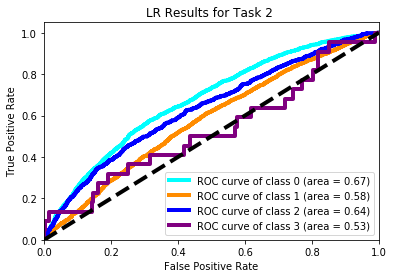

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

#iris = datasets.load_iris()
#X = iris.data
#y = iris.target

X = Education_pred__rs
y = Education_Level

#Change this model as well.
lr_clf = LogisticRegression(C=.001,class_weight='balanced',penalty='l2',solver='liblinear') 

# create the pipline
#code utlized from 04 Logits & SVM notebook
#piped_object_lr = Pipeline([('scale', std_scl),  # do this
                         #('logit_model', lr_clf)]) # and then do this

y = label_binarize(y, classes=[1,2,3,4])
n_classes = y.shape[1]

#Add noisy features to make the problem harder

random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2,
                                                    random_state=0)

# Change the pipeline model here !!!!

classifier = OneVsRestClassifier(Pipeline([('scale', std_scl),('logit_model', lr_clf)]))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw = 4

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()

colors = cycle(['aqua', 'darkorange', 'blue','purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LR Results for Task 2 ')   # < ------- Change Graph Title
plt.legend(loc="lower right")

plt.show()

*Seen in the plot above for Logistic Regression results on Education Level Predictions:*

* class 0 represents Masters/PDH 
* class 1 represents University degree 
* class 2 represents High School level 
* class 3 represents Other type of education

Based on Limit balance being identified as an important feature and as function of income, the model possibly did best at predicting those with Class 0 and 2 due to drawing differences in their income levels. For example an individual with a PHD/Masters should earn roughly twice as much as those with only a High School education.
Class 1 and 3 were the most under represented in the data set and therefore had the least area. Additionally they were not many strong attributes to distinguish between these classes.

<a id="FOREST2"></a>
## Base Random Forest (Classification Task 2)

In [47]:
%%time
#Random Forest
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics as mt
from sklearn.pipeline import Pipeline


std_scl = StandardScaler()
rf_clf = RandomForestClassifier()

piped_object = Pipeline([('scale', std_scl),  
                         ('Random_Forest', rf_clf)]) 


Iteration = []
Accuracy = []
Sensitivity = []
Specificity = []

for iter_num, (train_indices, test_indices) in enumerate(Education_cv_object.split(Education_pred__rs,Education_Level)):
    piped_object.fit(Education_pred__rs[train_indices],Education_Level[train_indices])  # train object
    y_hat = piped_object.predict(Education_pred__rs[test_indices]) # get test set precitions
    
    cm1 = mt.confusion_matrix(Education_Level[test_indices],y_hat)
    
    Iteration.append(iter_num)
    Accuracy.append(mt.accuracy_score(Education_Level[test_indices],y_hat))
    Sensitivity.append(cm1[0,0]/(cm1[0,0]+cm1[0,1]))
    Specificity.append(cm1[1,1]/(cm1[1,0]+cm1[1,1]))
    
rf_base_results = pd.DataFrame({'Iteration':Iteration,'Accuracy': Accuracy,'Sensitivity':Sensitivity,
                                'Specificity':Specificity},columns = ['Iteration','Accuracy','Sensitivity','Specificity'])


rf_base_results

Wall time: 32 s


,Iteration,Accuracy,Sensitivity,Specificity
0,0,0.536643,0.548293,0.705526
1,1,0.533784,0.556641,0.707317
2,2,0.546622,0.590775,0.697460
3,3,0.539865,0.579154,0.703305
4,4,0.536824,0.578125,0.684091
5,5,0.542568,0.587317,0.703646
6,6,0.533108,0.555556,0.703902
7,7,0.544257,0.587488,0.702993
8,8,0.549324,0.577299,0.699014
9,9,0.530405,0.564579,0.699466


### RF Tuning (Classification Task 2)

In [48]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

#Grab the parameters from 
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
#utilized parameter writing from following link
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

# Number of trees in random forest
n_estimators = [10,100]
#criterion
criterion  = ['gini']
# Maximum number of levels in tree
max_depth = [10,100]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
class_weight = ['balanced','balanced_subsample']
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Method of selecting samples for training each tree
bootstrap = ['bool', False]


X_train, X_test, y_train, y_test = train_test_split(Education_pred__rs,Education_Level,test_size = 0.20)


random_forest_grid = {'n_estimators': n_estimators,
                      'criterion':criterion,
                       'max_features': max_features,
                       'max_depth': max_depth,
                       'min_samples_split': min_samples_split,
                       'min_samples_leaf': min_samples_leaf,
                        'bootstrap': bootstrap}


RF_TASK2_grid = GridSearchCV(RandomForestClassifier(),param_grid=random_forest_grid,cv=10,scoring='accuracy',refit=True,verbose=2,
                   n_jobs=-1,error_score=0)


piped_object_lr_pt = Pipeline([('scale', std_scl),  
                         ('gridsearch', RF_TASK2_grid)])


piped_object_lr_pt.fit(X_train,y_train)


print(RF_TASK2_grid.best_estimator_)
print("------------------------------------------------------------------------")
cv_results = pd.DataFrame(RF_TASK2_grid.cv_results_)
print(cv_results.iloc[RF_TASK2_grid.best_index_])
print("------------------------------------------------------------------------")
print(RF_TASK2_grid.best_params_)

Fitting 10 folds for each of 96 candidates, totalling 960 fits
RandomForestClassifier(bootstrap='bool', max_depth=10, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=5)
------------------------------------------------------------------------
mean_fit_time                                                                                                                                                              3.00151
std_fit_time                                                                                                                                                              0.216553
mean_score_time                                                                                                                                                          0.0693308
std_score_time                                                                                                                                                           0.0138426
param_bo

### Final RF (Classification Task 2)

In [49]:
%%time

std_scl = StandardScaler()
rf_clf = RandomForestClassifier(bootstrap= 'bool', criterion= 'gini', max_depth= 10, 
                           max_features='sqrt', min_samples_leaf= 2, min_samples_split= 5, n_estimators = 100)

piped_object = Pipeline([('scale', std_scl),  
                         ('Random_Forest', rf_clf)]) 


Iteration = []
Accuracy = []
Sensitivity = []
Specificity = []

for iter_num, (train_indices, test_indices) in enumerate(Education_cv_object.split(Education_pred__rs,Education_Level)):
    piped_object.fit(Education_pred__rs[train_indices],Education_Level[train_indices])  # train object
    y_hat = piped_object.predict(Education_pred__rs[test_indices]) # get test set precitions
    
    cm1 = mt.confusion_matrix(Education_Level[test_indices],y_hat)
    
    Iteration.append(iter_num)
    Accuracy.append(mt.accuracy_score(Education_Level[test_indices],y_hat))
    Sensitivity.append(cm1[0,0]/(cm1[0,0]+cm1[0,1]))
    Specificity.append(cm1[1,1]/(cm1[1,0]+cm1[1,1]))
    
rf_best_results = pd.DataFrame({'Iteration':Iteration,'Accuracy': Accuracy,'Sensitivity':Sensitivity,
                                'Specificity':Specificity},columns = ['Iteration','Accuracy','Sensitivity','Specificity'])

feature_importances_2 = pd.DataFrame(rf_clf.feature_importances_,
                                   index = ed_imp_col ,
                                    columns=['importance Task_2']).sort_values('importance Task_2', ascending=False)

rf_best_results

Wall time: 16.9 s


,Iteration,Accuracy,Sensitivity,Specificity
0,0,0.556906,0.551429,0.750921
1,1,0.563514,0.587103,0.743533
2,2,0.570608,0.591128,0.747430
3,3,0.557770,0.559694,0.742078
4,4,0.558108,0.577735,0.730205
5,5,0.560811,0.575931,0.742604
6,6,0.567905,0.579600,0.747423
7,7,0.547635,0.546065,0.737850
8,8,0.557095,0.586437,0.708242
9,9,0.548649,0.541547,0.741065


<a id="KNN2"></a>
## KNN Model (Classification Task 2)

In [52]:
%%time

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics as mt
from sklearn.pipeline import Pipeline


std_scl = StandardScaler()
knn_clf = KNeighborsClassifier()

piped_object = Pipeline([('scale', std_scl),  
                         ('KNN', knn_clf)]) 


Iteration = []
Accuracy = []
Sensitivity = []
Specificity = []

for iter_num, (train_indices, test_indices) in enumerate(Education_cv_object.split(Education_pred__rs,Education_Level)):
    piped_object.fit(Education_pred__rs[train_indices],Education_Level[train_indices])  # train object
    y_hat = piped_object.predict(Education_pred__rs[test_indices]) # get test set precitions
    
    cm1 = mt.confusion_matrix(Education_Level[test_indices],y_hat)
    
    Iteration.append(iter_num)
    Accuracy.append(mt.accuracy_score(Education_Level[test_indices],y_hat))
    Sensitivity.append(cm1[0,0]/(cm1[0,0]+cm1[0,1]))
    Specificity.append(cm1[1,1]/(cm1[1,0]+cm1[1,1]))
    
knn_task2b_results = pd.DataFrame({'Iteration':Iteration,'Accuracy': Accuracy,'Sensitivity':Sensitivity,
                                'Specificity':Specificity},columns = ['Iteration','Accuracy','Sensitivity','Specificity'])


knn_task2b_results

Wall time: 3.79 s


,Iteration,Accuracy,Sensitivity,Specificity
0,0,0.510301,0.608147,0.624331
1,1,0.516216,0.585839,0.647963
2,2,0.499662,0.585770,0.616908
3,3,0.495270,0.579612,0.606342
4,4,0.500338,0.612745,0.604278
5,5,0.506757,0.582846,0.631700
6,6,0.498311,0.598832,0.609133
7,7,0.501351,0.606299,0.615385
8,8,0.505068,0.592989,0.615975
9,9,0.497973,0.580739,0.618029


### KNN Parameter Tuning (Classification Task 2)

In [53]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Education_pred__rs,Education_Level,test_size = 0.20)

std_scl = StandardScaler()
knn_clf = KNeighborsClassifier()


KNN_grid = {'n_neighbors': [5,7,8,10],
            'leaf_size': [5,7,8,10],
            'weights': ['uniform','distance'],
            'algorithm': ['auto'],
            'metric': ['minkowski','seuclidean'],
             'p': [1,2]
             }


KNN_TASK2_grid = GridSearchCV(KNeighborsClassifier(),param_grid=KNN_grid,cv=10,scoring='accuracy',refit=True,verbose=2,
                   n_jobs=-1,error_score=0)


piped_object_lr_pt = Pipeline([('scale', std_scl),  
                         ('gridsearch', KNN_TASK2_grid)])


piped_object_lr_pt.fit(X_train,y_train)


print(KNN_TASK2_grid.best_estimator_)
print("------------------------------------------------------------------------")
cv_results = pd.DataFrame(KNN_TASK2_grid.cv_results_)
print(cv_results.iloc[KNN_TASK2_grid.best_index_])
print("------------------------------------------------------------------------")
print(KNN_TASK2_grid.best_params_)

Fitting 10 folds for each of 128 candidates, totalling 1280 fits
KNeighborsClassifier(leaf_size=7, n_neighbors=10, p=1)
------------------------------------------------------------------------
mean_fit_time                                                                                                              0.20298
std_fit_time                                                                                                             0.0138106
mean_score_time                                                                                                           0.591767
std_score_time                                                                                                           0.0454438
param_algorithm                                                                                                               auto
param_leaf_size                                                                                                                  7
param_metric         

### KNN After Tuning (Classification Task 2)

In [54]:
%%time

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics as mt
from sklearn.pipeline import Pipeline


std_scl = StandardScaler()
knn_clf = KNeighborsClassifier(algorithm='auto', leaf_size= 7, metric='minkowski',
                               n_neighbors= 10, p= 1, weights= 'uniform')

piped_object = Pipeline([('scale', std_scl),  
                         ('KNN', knn_clf)]) 


Iteration = []
Accuracy = []
Sensitivity = []
Specificity = []

for iter_num, (train_indices, test_indices) in enumerate(Education_cv_object.split(Education_pred__rs,Education_Level)):
    piped_object.fit(Education_pred__rs[train_indices],Education_Level[train_indices])  # train object
    y_hat = piped_object.predict(Education_pred__rs[test_indices]) # get test set precitions
    
    cm1 = mt.confusion_matrix(Education_Level[test_indices],y_hat)
    
    Iteration.append(iter_num)
    Accuracy.append(mt.accuracy_score(Education_Level[test_indices],y_hat))
    Sensitivity.append(cm1[0,0]/(cm1[0,0]+cm1[0,1]))
    Specificity.append(cm1[1,1]/(cm1[1,0]+cm1[1,1]))
    
knn_task2f_results = pd.DataFrame({'Iteration':Iteration,'Accuracy': Accuracy,'Sensitivity':Sensitivity,
                                'Specificity':Specificity},columns = ['Iteration','Accuracy','Sensitivity','Specificity'])


knn_task2f_results

Wall time: 3.88 s


,Iteration,Accuracy,Sensitivity,Specificity
0,0,0.518744,0.587779,0.649254
1,1,0.531419,0.608527,0.664404
2,2,0.523649,0.609922,0.644628
3,3,0.525000,0.593598,0.654340
4,4,0.527027,0.632239,0.640449
5,5,0.531419,0.595146,0.669447
6,6,0.505405,0.568798,0.638995
7,7,0.523649,0.600583,0.655198
8,8,0.525676,0.613372,0.643346
9,9,0.515878,0.574879,0.656391


<a id="MODEL4"></a>
# Modeling and Evaluation 4

In [122]:
import pandas as pd
Scores1 = pd.DataFrame(
{'Task 1 Model': ['Logistic Regression', 'Random Forest:', 'KNN:'],
'Avg Accuracy': ['0.7209917', '0.8113709', '0.7783674'],
 'Avg Sensitivity' : ['0.7243861','0.8252825','0.7481036'],
 'Avg Specificity': ['0.7175728','0.7975034','0.8085837'],
 'Avg Time to Run': ['704ms','1m 16s','11.1s'],
 'Avg Time to Tune': ['4m14s','11m50s','2m14s']})


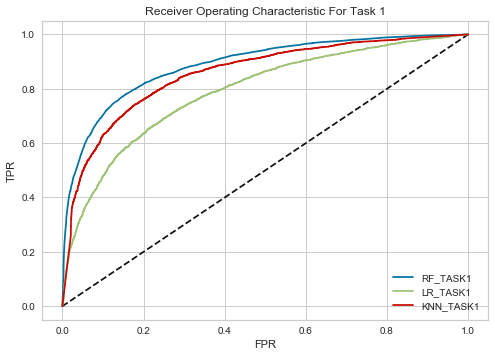

Wall time: 6.47 s


,Task 1 Model,Avg Accuracy,Avg Sensitivity,Avg Specificity,Avg Time to Run,Avg Time to Tune
0,Logistic Regression,0.7209917,0.7243861,0.7175728,704ms,4m14s
1,Random Forest:,0.8113709,0.8252825,0.7975034,1m 16s,11m50s
2,KNN:,0.7783674,0.7481036,0.8085837,11.1s,2m14s


In [123]:
%%time
from sklearn.metrics import roc_curve


X_train, X_test, y_train, Y_test = train_test_split(X_rs, y_rs, test_size = 0.20)

std_scl.fit(X_train)

X_train = std_scl.transform(X_train) # apply to training
X_test = std_scl.transform(X_test) 

Random_Forest_TASK1 = RandomForestClassifier(bootstrap= 'bool', criterion= 'gini', max_depth= 100, 
                           max_features='sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators = 100)


LR_TASK1 =  LogisticRegression(C=.1,class_weight='balanced',penalty='l1',solver='liblinear') 


KNN_TASK1 = KNeighborsClassifier(algorithm='auto',leaf_size= 10,n_neighbors=10,p= 1,weights='distance',metric = 'minkowski')


Random_Forest_TASK1.fit(X_train,y_train)
LR_TASK1.fit(X_train,y_train)
KNN_TASK1.fit(X_train,y_train)


y_pred_prob1 = Random_Forest_TASK1.predict_proba(X_test)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(Y_test, y_pred_prob1)

y_pred_prob2 = LR_TASK1.predict_proba(X_test)[:,1]
fpr2 , tpr2, thresholds2 = roc_curve(Y_test, y_pred_prob2)



y_pred_prob3 = KNN_TASK1.predict_proba(X_test)[:,1]
fpr3 , tpr3, thresholds3 = roc_curve(Y_test, y_pred_prob3)


plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "RF_TASK1")
plt.plot(fpr2, tpr2, label= "LR_TASK1")
plt.plot(fpr3, tpr3, label= "KNN_TASK1")
plt.legend(loc="lower right")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic For Task 1')
plt.show()


Scores1

<a id="T1"></a>
### Task 1 Models Evaluation 
Based on the results summary for task 1 models seen in the table above, Random forest outperformed the other models for predicting payment default. Therefore we believe Random Forest is the best model for classification of payment default. 

*Random Forest vs. KNN*
* Random forest reported 81% accuracy, 4% higher compared to the KNN model.
* The Random forest model also outperformed in terms of sensitivity with an improved score of 8%. 
* In terms of Specificity the Random Forest model performed slightly worse at 1% less than KNN.
* The trade off for this improvement was obviously in time to tune and run where Random Forest took roughly 6 times longer to tune than the KNN model and over a full minute longer to run.
* The visual shows a higher area on the curve for Random Forest vs. KNN model.

*Random Forest vs. Logistic Regression*
* Random forest reported a 9% improved accuracy than Logistic Regression. 
* The Random forest outperformed Logistic Regression on sensitivity with an improved score of 10%. 
* In terms of Specificity Random forest also outperformed Logistic Regression by 8%. 
* The trade off for this improvement was again seen in time to tune and run where Random Forest took rougly 3 times longer to run than Logistic Regression which had the fastest run time.
* The visual shows a higher area on the curve for Random Forest vs. Logistic Regression.

In [66]:
Scores2 = pd.DataFrame(
{'Task 2 Model': ['Logistic Regression', 'Random Forest:', 'KNN:'],
'Avg Accuracy': ['0.5473752', '0.5606991', '0.5238136'],
 'Avg Sensitivity' : ['0.6002046','0.5651764','0.5942977'],
 'Avg Specificity': ['0.7080753','0.7460405','0.6608657'],
 'Avg Time to Run': ['1.07s','18.7s','7.33s'],
 'Avg Time to Tune': ['1m','7m4s','1m11s']})
Scores2

,Task 2 Model,Avg Accuracy,Avg Sensitivity,Avg Specificity,Avg Time to Run,Avg Time to Tune
0,Logistic Regression,0.5473752,0.6002046,0.7080753,1.07s,1m
1,Random Forest:,0.5606991,0.5651764,0.7460405,18.7s,7m4s
2,KNN:,0.5238136,0.5942977,0.6608657,7.33s,1m11s


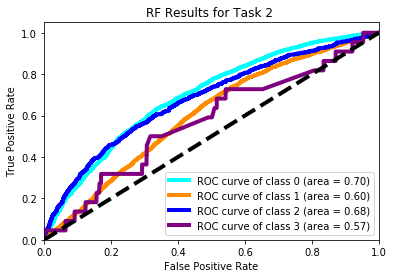

In [50]:
X = Education_pred__rs
y = Education_Level

#Change this model as well.
rf_clf = RandomForestClassifier(bootstrap= 'bool', criterion= 'gini', max_depth= 10, 
                           max_features='sqrt', min_samples_leaf= 2, min_samples_split= 5, n_estimators = 100)


y = label_binarize(y, classes=[1,2,3,4])
n_classes = y.shape[1]

#Add noisy features to make the problem harder

random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2,
                                                    random_state=0)

# Change the pipeline model here !!!!

classifier = OneVsRestClassifier(Pipeline([('scale', std_scl),('Random_Forest', rf_clf)]))

y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

# Compute ROC curve and ROC area for each class

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw = 4

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()

colors = cycle(['aqua', 'darkorange', 'blue','purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RF Results for Task 2 ')   # < ------- Change Graph Title
plt.legend(loc="lower right")

plt.show()

*Seen in the plot above for Random Forest results on Education Level Predictions:*

* class 0 represents Masters/PDH 
* class 1 represents University degree 
* class 2 represents High School level 
* class 3 represents Other type of education

Based on Limit balance being identified as an important feature and as function of income, the model possibly did best at predicting those with Class 0 and 2 due to drawing differences in their income levels. For example an individual with a PHD/Masters should earn roughly twice as much as those with only a High School education.
Class 1 and 3 were the most under represented in the data set and therefore had the least area. Additionally they were not many strong attributes to distinguish between these classes.

<a id="T2"></a>
### Task 2 Models
Based on the results summary for task 2 models seen in the table above, Random forest outperformed the other models for predicting education level. Therefore we believe Random Forest is the best model for classification of education level.
The scores for accuracy and specificity were roughly 56% which while low is still an improvement over random selection of 1 in 4 categories. Sensitivity was at 74% which identifies true negatives, this makes sense as there were 4 categories to select from so 3 of 4 would be negative results or 75%.

*Random Forest vs. KNN*
* Random forest reported a 4% higher accuracy compared to the KNN model.
* The Random forest model did worse in terms of sensitivity with a score 4% lower than KNN. 
* In terms of Specificity the Random Forest model performed better at 8% higher than KNN.
* Similarly to task 1 we again see that time to tune were far worse where Random Forest took roughly 7 times longer than the KNN model.

*Random Forest vs. Logistic Regression*
* Random forest reported a 2% improved accuracy than Logistic Regression. 
* The Random forest outperformed Logistic Regression on sensitivity with an improved score of 4%. 
* In terms of Specificity Random forest was worse than Logistic Regression by 4%. 
* Random Forest also took roughly 7 times longer to run than Logistic Regression.

<a id="MODEL5"></a>
# Modeling and Evaluation 5

### Task 1: 95% Confidence Intervals and T-Testing

In [57]:
%%time

#utlized code from https://github.com/jakemdrew/DataMiningNotebooks/blob/master/06.%20Classification.ipynbfrom sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

knn_clf = KNeighborsClassifier(algorithm='auto',leaf_size= 10,n_neighbors=10,p= 1,weights='distance',metric = 'minkowski')


rf_clf =  RandomForestClassifier(bootstrap= 'bool', criterion= 'gini', max_depth= 100, 
                           max_features='sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators = 100)

lr_clf = LogisticRegression(C=.1,class_weight='balanced',penalty='l1',solver='liblinear')  

clf1 = piped_object = Pipeline([('scale', std_scl), 
                         ('KNN', knn_clf)])

clf2 = piped_object = Pipeline([('scale', std_scl), 
                         ('RF', rf_clf)])

clf3 = piped_object = Pipeline([('scale', std_scl), 
                         ('LR', lr_clf)])


#Creating the ACC
KNN_ACC_TASK1 = cross_val_score(clf1, X =X_rs, y =y_rs, cv=cv_object)  #<-----Change the X,Y & CV!!!
RF_ACC_TASK1 = cross_val_score(clf2, X_rs, y =y_rs ,cv=cv_object)  #<-----Change the X,Y & CV!!!
LR_ACC_TASK1 = cross_val_score(clf3, X_rs, y =y_rs, cv=cv_object)   #<-----Change the X,Y & CV!!!

t = 2.26 / np.sqrt(10)

KNN_RF_TASK1 = (1-KNN_ACC_TASK1)-(1-RF_ACC_TASK1)
stdtot_KNN_RF_TASK1 = np.std(KNN_RF_TASK1)
dbar_KNN_RF_TASK1 = np.mean(KNN_RF_TASK1)

KNN_LR_TASK1 = (1-KNN_ACC_TASK1)-(1-LR_ACC_TASK1)
stdtot_KNN_LR_TASK1 = np.std(KNN_LR_TASK1)
dbar_KNN_LR_TASK1 = np.mean(KNN_LR_TASK1)

RF_LR_TASK1 = (1-RF_ACC_TASK1)-(1-LR_ACC_TASK1)
stdtot_RF_LR_TASK1 = np.std(RF_LR_TASK1)
dbar_RF_LR_TASK1 = np.mean(RF_LR_TASK1)

#This gives us 95% CI for all 3 models.
print('Range of KNN VS RF for Task 1:',dbar_KNN_RF_TASK1-t*stdtot_KNN_RF_TASK1,dbar_KNN_RF_TASK1+t*stdtot_KNN_RF_TASK1)
print('Range of KNN VS LR for Task 1:',dbar_KNN_LR_TASK1-t*stdtot_KNN_LR_TASK1,dbar_KNN_LR_TASK1+t*stdtot_KNN_LR_TASK1)
print('Range of RF VS LR for Task 1:',dbar_RF_LR_TASK1-t*stdtot_RF_LR_TASK1,dbar_RF_LR_TASK1+t*stdtot_RF_LR_TASK1)


Range of KNN VS RF for Task 1: 0.03134183069029252 0.03549152076095213
Range of KNN VS LR for Task 1: -0.05898136644795683 -0.053291706712169304
Range of RF VS LR for Task 1: -0.09189601515628408 -0.0872104094550867
Wall time: 56.6 s


The confidence intervals for task 1 model comparisons do not contain zero and therefore we are 95% confident that a difference exists between each respective set. But using a 10-fold cross validation violates assumptions of independent observations required for T-test. Therefore we must be skeptical of the results.

### T-Test KNN vs. Random Forest for Task 1

In [58]:
%%time
from mlxtend.evaluate import paired_ttest_5x2cv

t, p = paired_ttest_5x2cv(estimator1=clf1,     #<------- Change Model
                          estimator2=clf2,     #<------- Change Model
                          X=X_rs, y=y_rs,    #<---- Change Variables
                          random_seed=seed)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: -18.164
p value: 0.000
Wall time: 47.5 s


We reject the null hypothesis based on the p-value of 0.000 (alpha 0.05, t-stat -18.164) and do believe there is a statistically significant difference in results of the respective models.

### T-Test KNN vs. Logistic Regression for Task 1

In [59]:
%%time

t, p = paired_ttest_5x2cv(estimator1=clf1,     #<------- Change Model
                          estimator2=clf3,     #<------- Change Model
                          X=X_rs, y=y_rs,    #<---- Change Variables
                          random_seed=seed)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: 11.523
p value: 0.000
Wall time: 19.2 s


We reject the null hypothesis based on the p-value of 0.000 (alpha 0.05, t-stat 11.523) and do believe there is a statistically significant difference in results of the respective models.

### T-Test Logistic Regression vs. Random Forest for Task 1

In [60]:
%%time

t, p = paired_ttest_5x2cv(estimator1=clf3,     #<------- Change Model
                          estimator2=clf2,     #<------- Change Model
                          X=X_rs, y=y_rs,    #<---- Change Variables
                          random_seed=seed)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: -28.922
p value: 0.000
Wall time: 30.3 s


We reject the null hypothesis based on the p-value of 0.000 (alpha 0.05, t-stat -28.992) and do believe there is a statistically significant difference in results of the respective models.

### Task 2: 95% Confidence Intervals and T-Testing

In [61]:
%%time

#utlized code from https://github.com/jakemdrew/DataMiningNotebooks/blob/master/06.%20Classification.ipynbfrom sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

knn_clf = KNeighborsClassifier(algorithm='auto', leaf_size= 7, metric='minkowski',
                               n_neighbors= 10, p= 1, weights= 'uniform')

rf_clf = RandomForestClassifier(bootstrap= 'bool', criterion= 'gini', max_depth= 10, 
                           max_features='sqrt', min_samples_leaf= 2, min_samples_split= 5, n_estimators = 100)

lr_clf = LogisticRegression(C=.001,class_weight='balanced',penalty='l2',solver='liblinear')

clf1 = piped_object = Pipeline([('scale', std_scl), 
                         ('KNN', knn_clf)])

clf2 = piped_object = Pipeline([('scale', std_scl), 
                         ('RF', rf_clf)])

clf3 = piped_object = Pipeline([('scale', std_scl), 
                         ('LR', lr_clf)])

#Creating the ACC
KNN_ACC_TASK2 = cross_val_score(clf1, X =Education_pred__rs, y =Education_Level, cv=Education_cv_object)  #<-----Change the X,Y & CV!!!
RF_ACC_TASK2 = cross_val_score(clf2, Education_pred__rs, y =Education_Level ,cv=Education_cv_object)  #<-----Change the X,Y & CV!!!
LR_ACC_TASK2 = cross_val_score(clf3, Education_pred__rs, y =Education_Level, cv=Education_cv_object)   #<-----Change the X,Y & CV!!!

t = 2.26 / np.sqrt(10)

KNN_RF_TASK2 = (1-KNN_ACC_TASK2)-(1-RF_ACC_TASK2)
stdtot_KNN_RF_TASK2 = np.std(KNN_RF_TASK2)
dbar_KNN_RF_TASK2 = np.mean(KNN_RF_TASK2)

KNN_LR_TASK2 = (1-KNN_ACC_TASK2)-(1-LR_ACC_TASK2)
stdtot_KNN_LR_TASK2 = np.std(KNN_LR_TASK2)
dbar_KNN_LR_TASK2 = np.mean(KNN_LR_TASK2)

RF_LR_TASK2 = (1-RF_ACC_TASK2)-(1-LR_ACC_TASK2)
stdtot_RF_LR_TASK2 = np.std(RF_LR_TASK2)
dbar_RF_LR_TASK2 = np.mean(RF_LR_TASK2)

#This gives us 95% CI for all 3 models.
print('Range of KNN VS RF for Task 2:',dbar_KNN_RF_TASK2-t*stdtot_KNN_RF_TASK2,dbar_KNN_RF_TASK2+t*stdtot_KNN_RF_TASK2)
print('Range of KNN VS LR for Task 2:',dbar_KNN_LR_TASK2-t*stdtot_KNN_LR_TASK2,dbar_KNN_LR_TASK2+t*stdtot_KNN_LR_TASK2)
print('Range of RF VS LR for Task 2:',dbar_RF_LR_TASK2-t*stdtot_RF_LR_TASK2,dbar_RF_LR_TASK2+t*stdtot_RF_LR_TASK2)


Range of KNN VS RF for Task 2: 0.02924183646325797 0.04176900720716021
Range of KNN VS LR for Task 2: -0.010548028464541696 0.002710236265047376
Range of RF VS LR for Task 2: -0.04530283481966028 -0.033545801050252226
Wall time: 21.1 s


* For KNN vs. RF & RF vs. LR the confidence intervals for task 2 do not contain zero and therefore we are 95% confident that a difference exists between each respective set. But using a 10-fold cross validation violates assumptions of independent observations required for T-test. Therefore we must be skeptical of the results.
* KNN vs. LR does contain zero therefore we are 95% confident that a difference does not exist between models.

### T-Test KNN vs. Random Forest for Task 2

In [62]:
%%time
from mlxtend.evaluate import paired_ttest_5x2cv

t, p = paired_ttest_5x2cv(estimator1=clf1,     #<------- Change Model
                          estimator2=clf2,     #<------- Change Model
                          X=Education_pred__rs, 
                          y =Education_Level,    #<---- Change Variables
                          random_seed=seed)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: -11.723
p value: 0.000
Wall time: 21.3 s


We reject the null hypothesis based on the p-value of 0.000 (alpha 0.05, t-stat -11.723) and do believe there is a statistically significant difference in results of the respective models.

### T-Test KNN vs. Random Forest for Task 2

In [63]:
%%time

t, p = paired_ttest_5x2cv(estimator1=clf1,     #<------- Change Model
                          estimator2=clf3,     #<------- Change Model
                          X=Education_pred__rs, 
                          y =Education_Level,    #<---- Change Variables
                          random_seed=seed)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: 0.362
p value: 0.732
Wall time: 11.7 s


We fail to reject the null hypothesis based on the p-value of 0.732 (alpha 0.05, t-stat 0.362) and do not believe there is a statistically significant difference in results of the respective models.

### T-Test KNN vs. Random Forest for Task 2

In [64]:
%%time

t, p = paired_ttest_5x2cv(estimator1=clf3,     #<------- Change Model
                          estimator2=clf2,     #<------- Change Model
                          X=Education_pred__rs, 
                          y =Education_Level,    #<---- Change Variables
                          random_seed=seed)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: -5.495
p value: 0.003
Wall time: 12.1 s


We reject the null hypothesis based on the p-value of 0.000 (alpha 0.05, t-stat -5.495) and do believe there is a statistically significant difference in results of the respective models.

### Model Advantages

**Logistic Regression Models:**

*Advantages of LR:*
* Easier to use and interpret results, takes less time to classify unknown records.
* Does not make assumptions about class distributions.
* It can be used for multiple class predictions, such as in Task 2 for 4 education level categories.
* Provides coefficient sizes of attributes with a direction of their association.
* Can interpret feature importance for coefficients.
* Less likely to over-fit but possible in high dimensional datasets.

   
*Disadvantages of LR:*
* If the number of observations is less than the number of features it could lead to overfitting, this is not the case for our dataset.
* Assumptions of linearity between the dependent variable and the independent variables.
* Constructs linear boundaries, linearly separable data is rarely found in real-world data.
* Requires average or no multicollinearity between independent variables.
* Complex relationships will not work well with logistic regression.

**Random Forest Models:**

*Advantages of RF:*
* Can be used for both regression and classification tasks

* Default hyperparameters used often produce good prediction results.

* Clearly this was the best predictor for accuracy in both tasks 1 and 2.

* A statistical difference existed for Random Forest vs Logistic Regression in both tasks 1 and 2.

*Disadvantages of RF:*
* Overfitting may occur if there are not enough trees in the forest.

* Large numbers of trees slow down the model making them ineffective for real-time predictions. 

* Accuracy comes at the cost specifically for task 1 and 2 hypertuning leading to extended processing time tuning models.

* Random forest offers no description of the relationships in your data.

**KNN Models:**

*Advantages of KNN*

* Model only learns from the training set at the time of making real time predictions. This makes it much faster than other algorithms that require training.

* KNN is very easy to implement as it needs only two parameters (K and distance function)

*Disadvantages of KNN*

* The cost of calculating the distance between points in a large data set lowers performance.

* It is difficult for the algorithm to calculate the distances in a high dimentional dataset.

* Can give wrong predictions without feature scaling.

* Sensitive to noise in the dataset, missing values and outliers must be dealt with.



<a id="MODEL6"></a>
# Modeling and Evaluation 6

In [32]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

### Feature Importance Task 1

In [67]:
feature_importances_1

,importance Task_1
BILL_AMT1,0.155598
BILL_AMT2,0.137933
PAY_AMT1,0.135063
PAY_AMT2,0.134629
PAY_0,0.128129
LIMIT_BAL,0.123297
PAY_5,0.069777
MARRIAGE,0.041130
EDUCATION,0.038875
SEX,0.035568


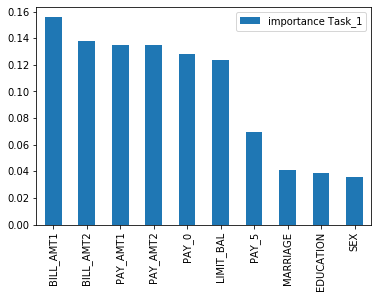

In [68]:
feature_importances_1
feature_importances_1.plot(kind='bar')
plt.show()

For task 1 classification of payment default we see in the table above that bill amounts are the most important feature.
* BILL_AMT1 makes sense as the highest feature because it represents the intial amount borrowed by the client. If they took on more than they could afford to repay it is likely they would default on the loan. BILL_AMT2 follows similar logic in that they may have perhaps made one payment on the loan but then gave up on repaying the rest of such a large amount.
* PAY_AMT 1 and 2 also show high feature significance to payment default. This makes sense as it represents how much the client is paying back on their loan. If they immediately give up on making payments in the first or second month they are likely to default on the loan.
* PAY_0 is quite significant while PAY_5 is where we see some departure from the importance of other higher features. PAY_0 represents delay in payment at the very start of the credit repayment. This would undoubtedly immediately signal trouble with the client handling repayment of their debt therefore it makes sense this would have such a high role of importance. PAY_5 is near the end of the payment cycles so makes sense as clients would struggle to make payments after a while and begin to default on their loan.

### Feature Importance Task 2

In [69]:
feature_importances_2

,importance Task_2
LIMIT_BAL,0.253349
AGE,0.220862
BILL_AMT1,0.125070
BILL_AMT6,0.110010
MARRIAGE,0.096648
PAY_2,0.072379
PAY_4,0.044192
PAY_6,0.034881
PAY_5,0.029863
default_payment_next_month,0.012746


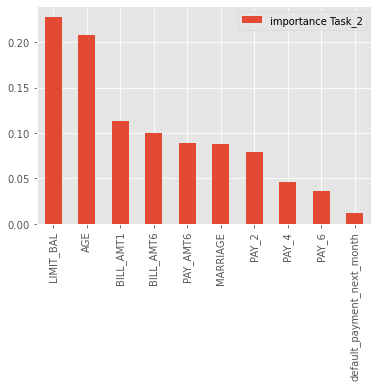

In [34]:
feature_importances_2
feature_importances_2.plot(kind='bar')
plt.show()

The table above shows that Limit Bal was the most important feature for random forest for task 2.  
* Perhaps Limit balance is the most important feature for task 2 because limit bal would be a function of education. For example, if an individual has a higher level of education their income generally should be higher. Therefore the credit card company would extend a higher limit balance to the borrower based on their incomes.   
* The importance of age suggests that age would be a good predictor for education. For example, an individual who is 21, you could assume their highest level of education would be university, but this assumption has limitations.  An individual could be in their 40’s and their highest projected level of education could be a Phd, but they could also only have a high school diploma.
* Bill_Amt1 and Bill_Amt6 are significant features for task 2 which is in line with our task 1.  Perhaps the bill amounts are important in predicting education level is because individual with higher levels of education may be servicing student loans. Therefore these individuals have to turn to credit card financing for various reason. 
* The PAY_AMT6 would follow the same assumptions as BILL_AMT1 and BILL_AMT6. If individuals with higher levels of education servicing student loans and credit card payments they are more likely to only meet the minimum credit card payment. 

<a id="DEPLOY"></a>
# Deployment

* **How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)?** 
    * A credit card company would want to better predict the likelihood of default for its customers, as well as identify key attributes such as education level, leading them to better clients. This would help advise the company's decisions on which clients to give credit and what credit limit to provide. It would also help the company have a better understanding of their current and future customers, helping to shape which clients to target with offers.
    
* **How would you measure the model's value if it was used by these parties?**
    * The model's value would be measured by it's accuracy in determining what clients would potentially go into default on repayment of money borrowed. Trait relationships analyzed by the model can also have value to the company, such as education level, which can offer insight into what type of clients the company should pursue to maintain a more profitable and reliable outcome.
    
* **How would your deploy your model for interested parties?**
    * We will first need to specify performance requirements for what attributes will have value to the company. 
    * Development of automated tests for the model (regression tests) to ensure the model is meeting the minimum performance requirements.
    * Over time the model and data will change therefore an evaluation process needs to be automated in order to back-test changes made to the model and see if improvements are made.
    
* **What other data should be collected?**
    * Categorized transaction data would be useful for comparing spending patterns with default risks.
    * Credit rating scores at time of application to analyze general credit risk of potential borrowers.
    * Annual income and other types of debt held by applicants/clients would allow us to calculate debt to income ratios. 
    
* **How often would the model need to be updated, etc.?**
    * Since the credit cards were based on monthly billing cycles it would be reasonable to update the model on a monthly basis. 

<a id="EXC"></a>
# Exceptional Work

**Grid Search**
* We used grid search for tuning parameters on our models for both tasks and compared the results to a base model to look for improvements in  accuracy, specificity and sensitivity. We also compared these in a visualization to make speculations on why some features were more important to the classifications than others.

**Recursive Feature Elimination**
* RFE was used on the base dataset to reduce the amount of features that were less important to the classification in both task 1 and 2. This improved the run time models needed and maintained similar levels in accuracy, specificity and sensitivity when compared to our base models.

**YellowBrick**
* We graphed the learning curve for grid search parameters, please see below:

##   Task 1 Yellow Brick Graphs

In [93]:
%%time
from yellowbrick.model_selection import LearningCurve

#Ulitized code from https://www.scikit-yb.org/en/latest/api/model_selection/learning_curve.html

def Learning_curve_plot(model):
    sizes = np.linspace(0.3, 1.0, 10)
    
    visualizer = LearningCurve(
    model, cv=cv_object,scoring='accuracy', 
    n_job=-1)

    visualizer.fit(X_rs,y_rs)        # Fit the data to the visualizer
    visualizer.show()           # Finalize and render the figure

Wall time: 0 ns


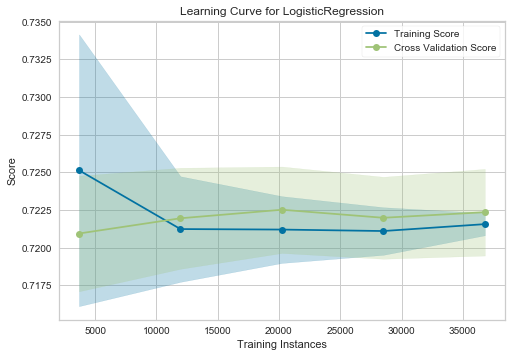

Wall time: 10.6 s


In [94]:
%%time
Learning_curve_plot(LR_TASK1_grid.best_estimator_)

Based on this graph the multiple parameters tested showed no significant differences between the training and cross-validation score.

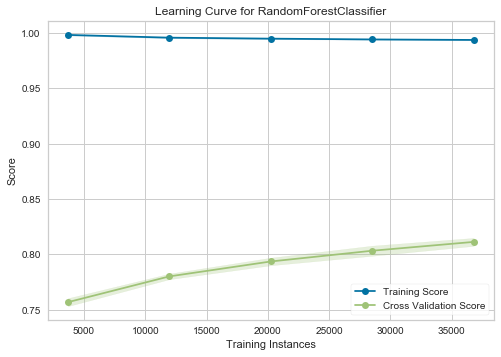

Wall time: 2min 31s


In [96]:
%%time
Learning_curve_plot(RF_Task1_grid.best_estimator_)

Generally the parameter tuning did not do much to improve the training score, however as more parameters were tuned the cross-validation score improved.

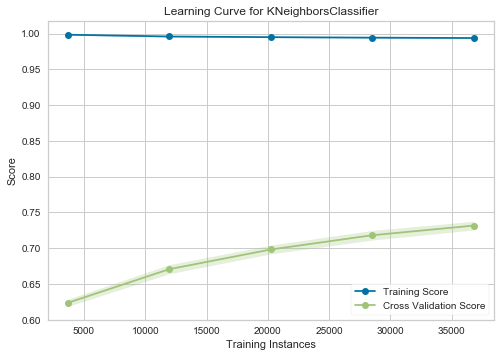

In [97]:
%%time
Learning_curve_plot(KNN_TASK1_grid.best_estimator_)

Generally the parameter tuning did not do much to improve the training score, however as more parameters were tuned the cross-validation score improved.

## Task 2 Yellow Brick Graphs

In [89]:
%%time
from yellowbrick.model_selection import LearningCurve

#Ulitized code from https://www.scikit-yb.org/en/latest/api/model_selection/learning_curve.html

def Learning_curve_plot(model):
    sizes = np.linspace(0.3, 1.0, 10)
    
    visualizer = LearningCurve(
    model, cv=Education_cv_object,scoring='accuracy', 
    n_job=-1)

    visualizer.fit(Education_pred__rs,Education_Level)        # Fit the data to the visualizer
    visualizer.show()           # Finalize and render the figure




Wall time: 0 ns


### LR Task 2

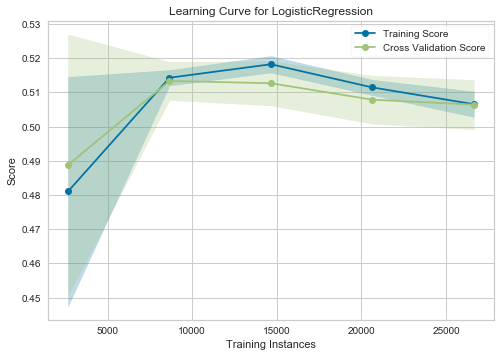

Wall time: 8.38 s


In [90]:
%%time
Learning_curve_plot(LR_TASK2_grid.best_estimator_)

Based on this graph the multiple parameters tested showed no significant differences between the training and cross-validation score.

### RF Task 2

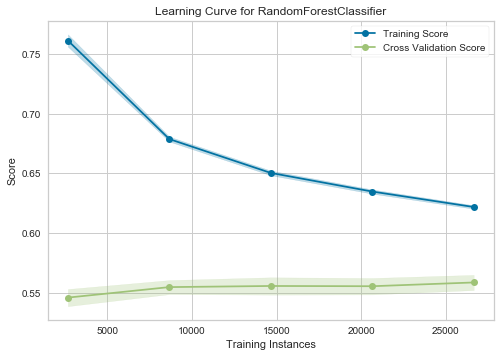

Wall time: 55.2 s


In [91]:
%%time
Learning_curve_plot(RF_TASK2_grid.best_estimator_)

Generally the parameter tuning decreased the training score, however as more parameters were tuned the cross-validation score slightly improved.

### KNN Task 2

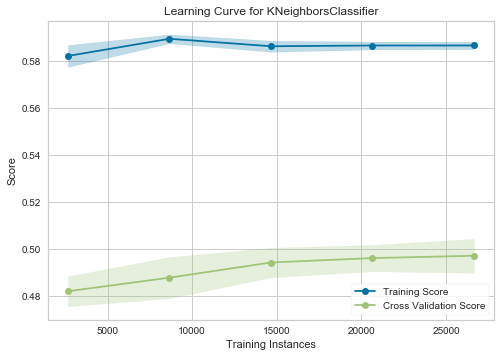

Wall time: 24.9 s


In [92]:
%%time
Learning_curve_plot(KNN_TASK2_grid.best_estimator_)

Generally the parameter tuning did not do much to improve the training score, however as more parameters were tuned the cross-validation score improved.